## Imbalanced Data: How to handle it
Data Gathering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/train_loan.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.shape

(58645, 13)

In [5]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [6]:
df['loan_status'].unique()

array([0, 1])

In [7]:
df['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

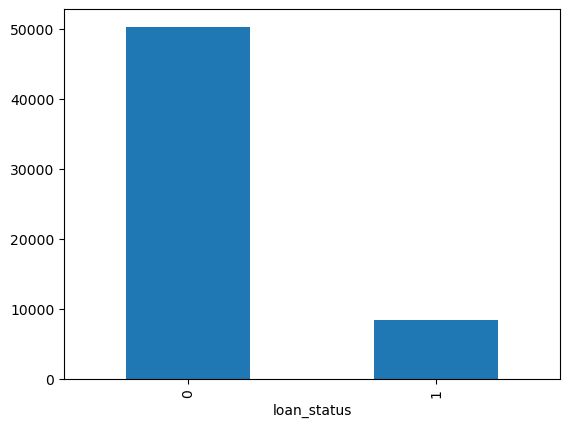

In [8]:
df['loan_status'].value_counts().plot(kind='bar')

In [9]:
# check for missing data
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [10]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [11]:
df = df.drop_duplicates()

## Separate X and Y features

In [12]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [13]:
X = df.drop(columns=['loan_status'])
Y = df[['loan_status']]

In [14]:
X.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [15]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing and Data Cleaning

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

con_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['id', 'person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__id,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.732021,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-1.731962,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-1.731903,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,-1.731844,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-1.731785,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


Train Test Split
rate at which you can divide:

100%

60 % training 40% testing

70% training 30% testing

80% training 20% testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.7,test_size=0.3,random_state=21)

In [21]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__id,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
16366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-0.765298,-0.257055,0.156966,1.338212,-0.039102,-0.345301,-0.318870,-0.450108
47034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.046230,-0.257055,-0.423038,-0.682117,-0.039102,0.425788,0.335502,-0.698298
23176,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-0.363038,-0.091305,-0.370311,0.328047,-1.009669,0.224777,-0.973242,-0.201917
21790,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.444908,2.229202,-0.805208,-0.429576,0.500101,1.088133,2.189555,1.287227
5551,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-1.404129,-0.920057,0.130602,-0.682117,1.039305,0.379654,0.662687,-0.698298


In [22]:
xtrain.index

Index([16366, 47034, 23176, 21790,  5551, 50702, 27435, 41479, 17470,   413,
       ...
       45258, 31231, 45666, 23228, 42104, 16432,  8964,  5944,  5327, 15305],
      dtype='int64', length=41051)

In [23]:
xtest.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__id,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
40062,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.634401,-0.920057,0.288785,0.328047,1.039305,-0.921970,0.444564,-0.698298
30128,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.047610,-1.085808,-0.818495,0.075506,-1.117510,0.267616,-0.755118,-0.946489
34643,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.314306,1.731951,1.475156,-0.429576,1.039305,1.124381,-0.318870,2.031798
39635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.609179,-0.422806,1.527884,-1.187200,0.500101,-1.116389,-0.646056,-0.450108
32787,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.204674,-1.085808,-1.055770,-0.682117,0.140632,2.172270,2.843926,-0.698298


In [24]:
ytrain.head()

,loan_status
16366,0
47034,0
23176,0
21790,1
5551,0


In [25]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


## Build the model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

Resampling through models =>
LogisticRegression(class_weight='balanced')

RandomForestClassifier(class_weight='balanced')

GradientBoostClassifier(class_weight='balanced')

X1,X2,X3,X4 ... independent features => class A X1,X2,X3,X4 ... independent features => class B

class weight=> for example: class A corresponds to majority datapoints class B corresponds to minority datapoints

adds weights => majority classes have lesser weight, minority classes have higher weights

X1W1, X2W2,X3W3 100 datapoints => class A => 100 datapoints=> weightsX1 => 5datapoints => Class B => 5 datapoints=> weightsX1 =>

data gets balanced due to these weight updations. 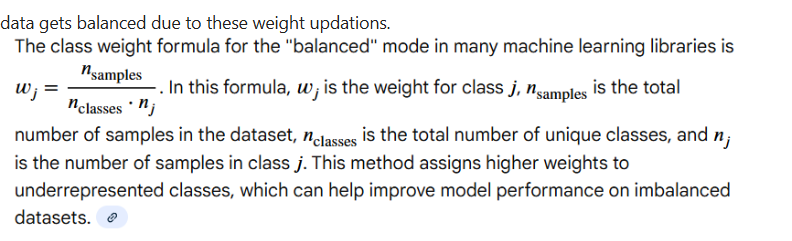

nsamples : 105 nsamples:class1 : 100 nsamples:class0:5

wclass1 = 105/(1002) = 105/200 = 0.525 wclass0 = 105/(52) = 105/10 = 10.5

wclass0X1 + wclass0X2 + .... = it will make the model feel that minority class has certain good datapoints, resulting in better understanding of properties of independent features

wclass1X1 + wclass1X2 ... = it will make the model feel that the majority class has certain features that differentiate it from minority class.

In [27]:
model1 = LogisticRegression(class_weight='balanced')
model2 = RandomForestClassifier(class_weight='balanced',
                                n_estimators=10,
                                max_depth=5)

In [28]:
model1.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [29]:
model2.fit(xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10)

## Model evaluation

In [30]:
model1.score(xtrain,ytrain)

0.8413436944288811

In [31]:
model1.score(xtest,ytest)

0.8426736387404797

In [32]:
model2.score(xtrain,ytrain)

0.8520133492484958

In [33]:
model2.score(xtest,ytest)

0.8514834602705468

## Oversampling techqniue:
SMOTE => Synthetic Minority Oversampling Technique => these collect the properties of minority class, based on that it creates multiple samples for minority class.

ADASYN: It tries to create complex properties for minority class

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import SMOTE,ADASYN

In [36]:
ytrain['loan_status'].value_counts()

loan_status
0    35246
1     5805
Name: count, dtype: int64

In [37]:
smote = SMOTE()

In [38]:
x_sampl,y_sampl = smote.fit_resample(xtrain,ytrain)

  File "c:\Users\Akshay\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Akshay\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Akshay\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Akshay\anaconda3\Lib\subproc

In [39]:
y_sampl.value_counts()

loan_status
0              35246
1              35246
Name: count, dtype: int64

In [40]:
model3 = LogisticRegression()
model3.fit(x_sampl,y_sampl)

LogisticRegression()

In [41]:
model3.score(x_sampl,y_sampl)

0.8393434715996141

In [42]:
model3.score(xtest,ytest)

0.8461975673525065

ADASYN

In [43]:
ada = ADASYN()

In [44]:
x_sampl2, y_sampl2 = ada.fit_resample(xtrain,ytrain)

In [45]:
y_sampl2.value_counts()

loan_status
0              35246
1              34230
Name: count, dtype: int64

In [46]:
model4 = LogisticRegression()
model4.fit(x_sampl2,y_sampl2)

LogisticRegression()

In [47]:
model4.score(x_sampl2,y_sampl2)

0.7608526685474121

In [48]:
model4.score(xtest,ytest)

0.7827668523360236

## Confusion Matrix

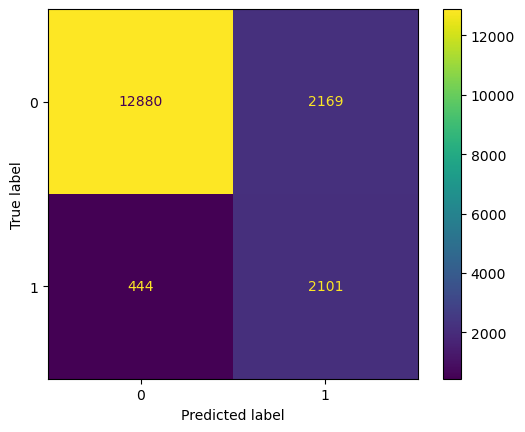

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model2,xtest,ytest)

## Classification Report

In [50]:
ypred_test = model2.predict(xtest)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15049
           1       0.49      0.83      0.62      2545

    accuracy                           0.85     17594
   macro avg       0.73      0.84      0.76     17594
weighted avg       0.90      0.85      0.87     17594



### All the scores are greater than 80%(0.80), we can consider this model for final model building

In [52]:
path2 = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/test_loan.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [53]:
xnew.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Preprocess and clean your out of sample data

In [54]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['id', 'person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [55]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__id,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.732080,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.732139,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.732198,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.732258,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.732317,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108


### Final Predictions

In [56]:
loanstatus_predicted = model2.predict(xnew_pre)

In [57]:
loanstatus_predicted

array([1, 0, 1, ..., 0, 1, 1])

In [58]:
xnew

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [59]:
xnew['predicted_results'] = loanstatus_predicted

In [60]:
xnew

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,predicted_results
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4,0
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3,0
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25,0
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4,1


In [61]:
xnew.to_csv("Loan Status Predicted.csv",index=False)